In [49]:
import numpy as np            # Numerical operations
import pandas as pd           # Data manipulation and analysis
import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns         # Enhanced data visualization
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

--------------------------------------------------------------------------------------------------------------------------------

# Importing Dataset

healthcare-dataset-stroke-data : [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

--------------------------------------------------------------------------------------------------------------------------------


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
print("Stroke dataset memiliki {} baris dan {} column".format(*df.shape))

Stroke dataset memiliki 5110 baris dan 12 column


In [4]:
df.iloc[13]

id                      8213
gender                  Male
age                     78.0
hypertension               0
heart_disease              1
ever_married             Yes
work_type            Private
Residence_type         Urban
avg_glucose_level     219.84
bmi                      NaN
smoking_status       Unknown
stroke                     1
Name: 13, dtype: object

In [5]:
df.iloc[872]

id                           2549
gender                     Female
age                          17.0
hypertension                    0
heart_disease                   0
ever_married                   No
work_type                 Private
Residence_type              Rural
avg_glucose_level           83.23
bmi                           NaN
smoking_status       never smoked
stroke                          0
Name: 872, dtype: object

In [6]:
df.iloc[4069]

id                     12693
gender                  Male
age                     31.0
hypertension               0
heart_disease              0
ever_married             Yes
work_type            Private
Residence_type         Urban
avg_glucose_level     108.62
bmi                      NaN
smoking_status        smokes
stroke                     0
Name: 4069, dtype: object

--------------------------------------------------------------------------------------------------------------------------------
# EDA 

Exploratory Data Analysis

--------------------------------------------------------------------------------------------------------------------------------


In [7]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2733,45931,Male,9.00,0,0,No,children,Urban,142.68,24.4,Unknown,0
2017,71978,Female,50.00,0,0,Yes,Private,Urban,95.01,26.2,formerly smoked,0
23,64778,Male,82.00,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
4628,38658,Female,62.00,0,0,Yes,Self-employed,Rural,213.92,44.6,never smoked,0
5082,24552,Female,44.00,0,0,Yes,Private,Rural,72.03,37.5,smokes,0
279,67210,Male,27.00,0,0,Yes,Self-employed,Urban,82.90,25.0,Unknown,0
89,49130,Male,74.00,0,0,Yes,Private,Urban,98.55,25.6,Unknown,1
933,19681,Female,74.00,0,0,Yes,Self-employed,Urban,99.21,22.1,never smoked,0
3605,49553,Male,1.88,0,0,No,children,Rural,143.97,NaN,Unknown,0
3836,71396,Male,3.00,0,0,No,children,Urban,105.34,15.5,Unknown,0


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Numerical Column 
    ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi' 'stroke']
 
#### Categorical Column
    ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    
#### Unused Column
    ['id]


In [10]:
# Delete 'id' column

df.drop(['id'],
        axis=1,
        inplace = True)

In [11]:
df.sample(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
641,Male,15.0,0,0,No,children,Rural,85.06,21.6,never smoked,0
2104,Female,49.0,1,0,Yes,Private,Rural,65.34,39.4,never smoked,0


'Id' column deleted

In [12]:
duplicates_rows = df.duplicated().sum()

print("Number of Duplicate Rows:", duplicates_rows)

Number of Duplicate Rows: 0


> This dataset has no duplicate row(s)

--------------------------------------------------------------------------------------------------------------------------------
# Data Visualization

--------------------------------------------------------------------------------------------------------------------------------


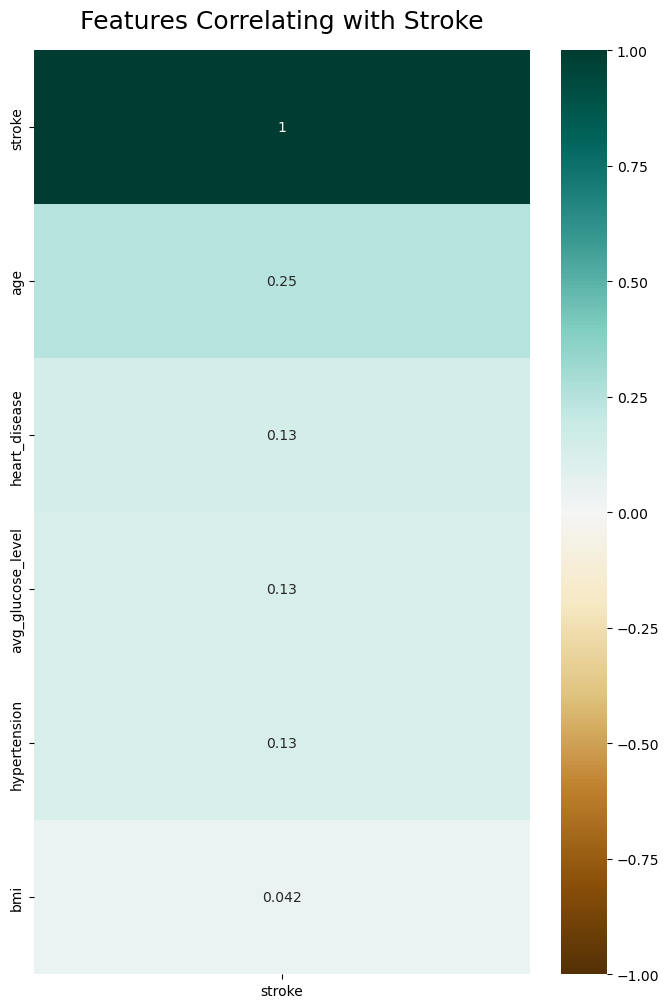

In [13]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

> The visualization has not been able to display all the features because some are still object-type data

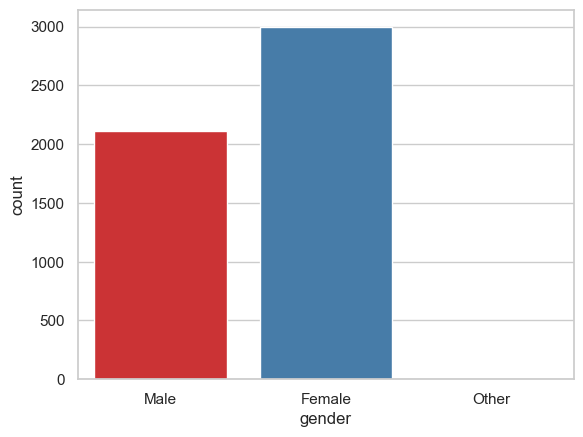

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [14]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="gender")
plt.show()
print(df['gender'].value_counts())

'Other' will be deleted

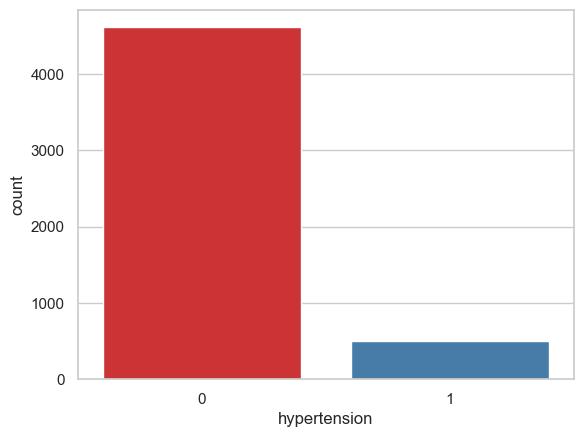

0    4612
1     498
Name: hypertension, dtype: int64


In [15]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="hypertension")
plt.show()
print(df['hypertension'].value_counts())

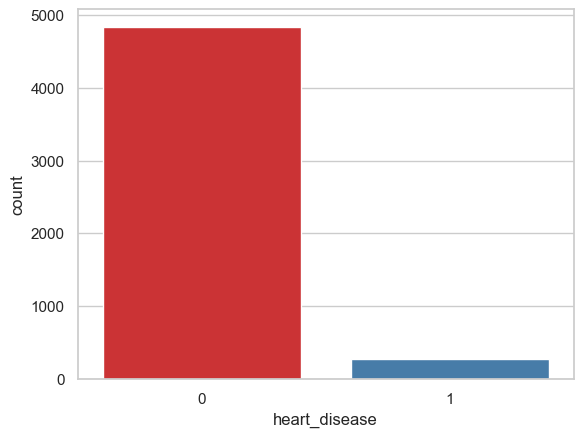

0    4834
1     276
Name: heart_disease, dtype: int64


In [16]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="heart_disease")
plt.show()
print(df['heart_disease'].value_counts())

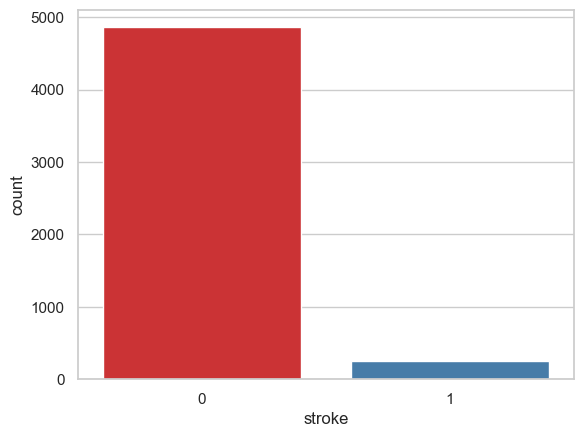

0    4861
1     249
Name: stroke, dtype: int64


In [17]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="stroke")
plt.show()
print(df['stroke'].value_counts())

This result could indicate imbalance data.

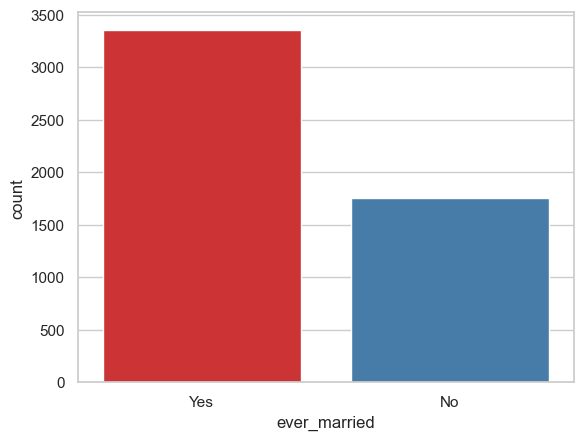

Yes    3353
No     1757
Name: ever_married, dtype: int64


In [18]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="ever_married")
plt.show()
print(df['ever_married'].value_counts())

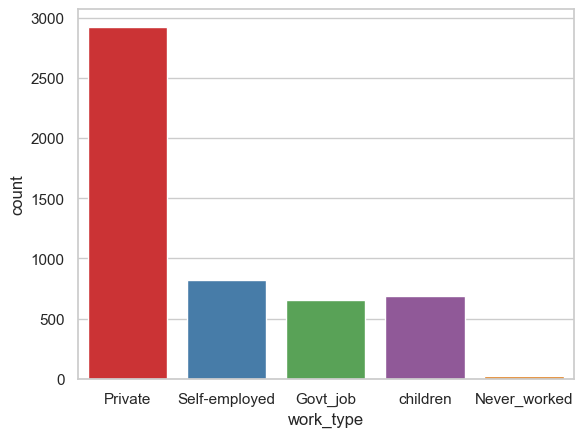

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [19]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="work_type")
plt.show()
print(df['work_type'].value_counts())

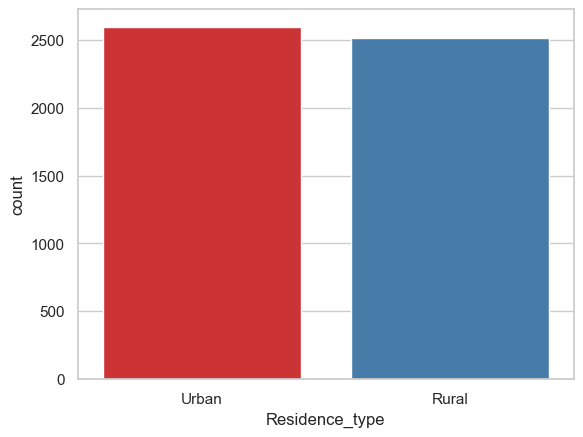

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


In [20]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="Residence_type")
plt.show()
print(df['Residence_type'].value_counts())

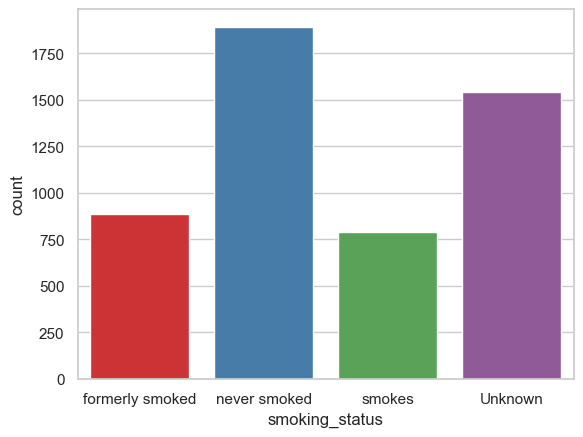

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [21]:
sns.set_theme(style="whitegrid", palette="Set1")
ax = sns.countplot(data=df, x="smoking_status")
plt.show()
print(df['smoking_status'].value_counts())

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

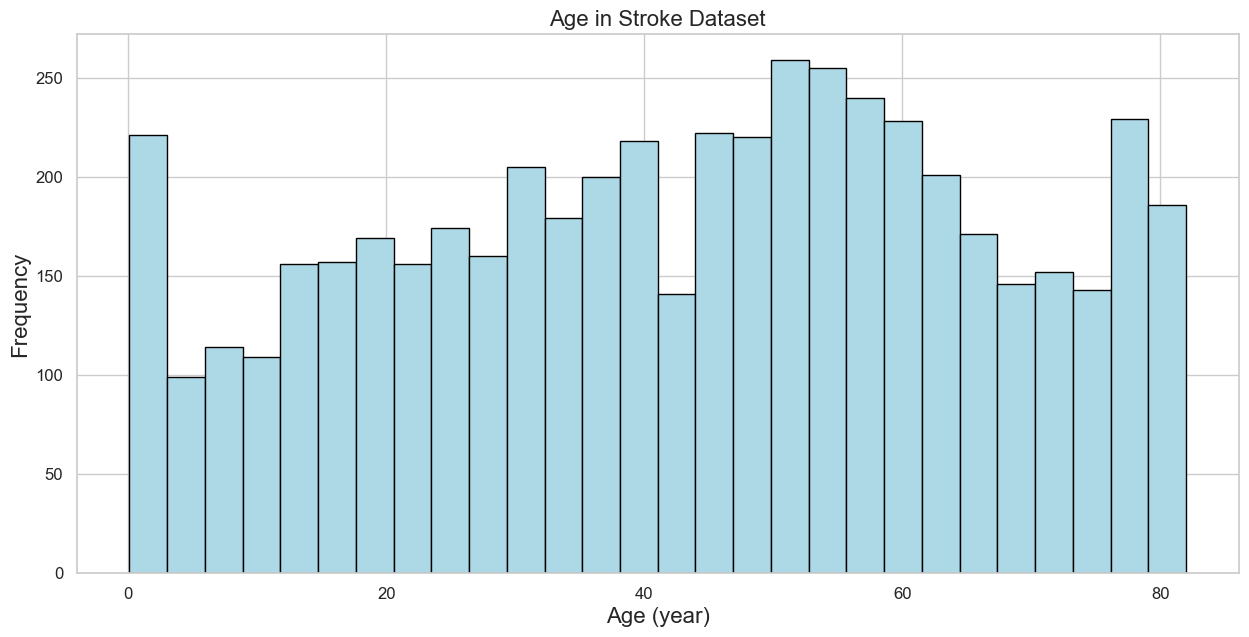

In [22]:
plt.figure(figsize=(15, 7))
plt.hist(df['age'], color = 'lightblue', edgecolor = 'black',
         bins = int(85/3))

plt.title('Age in Stroke Dataset', fontsize=16)
plt.xlabel('Age (year)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800')])

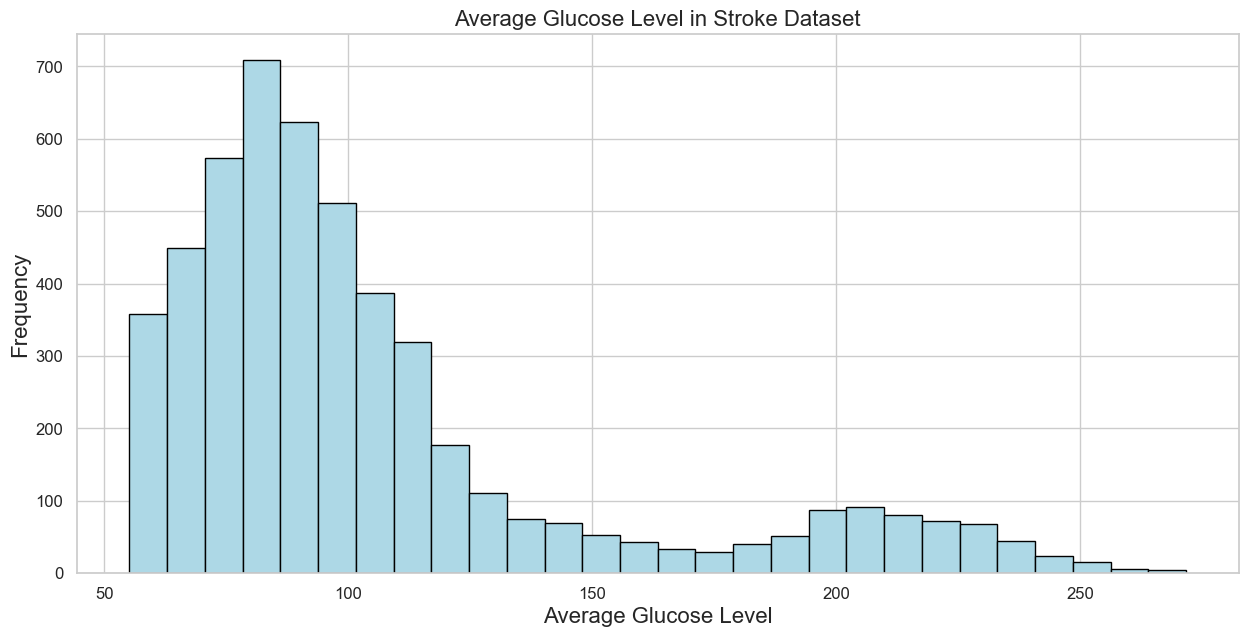

In [23]:
plt.figure(figsize=(15, 7))
plt.hist(df['avg_glucose_level'], color = 'lightblue', edgecolor = 'black',
         bins = int(85/3))

plt.title('Average Glucose Level in Stroke Dataset', fontsize=16)
plt.xlabel('Average Glucose Level', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000')])

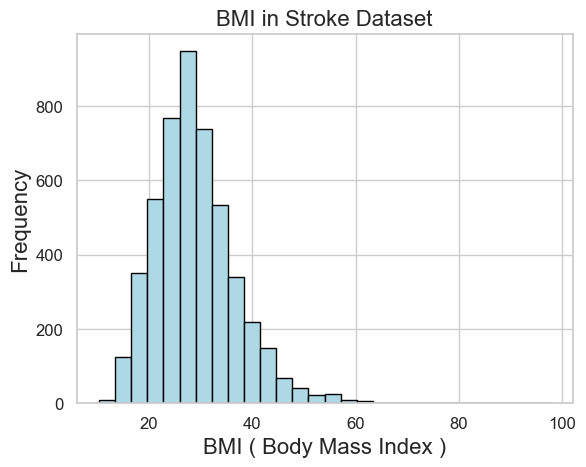

In [24]:

plt.hist(df['bmi'], color = 'lightblue', edgecolor = 'black',
         bins = int(85/3))

plt.title('BMI in Stroke Dataset', fontsize=16)
plt.xlabel('BMI ( Body Mass Index )', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

Text(0, 0.5, 'Density')

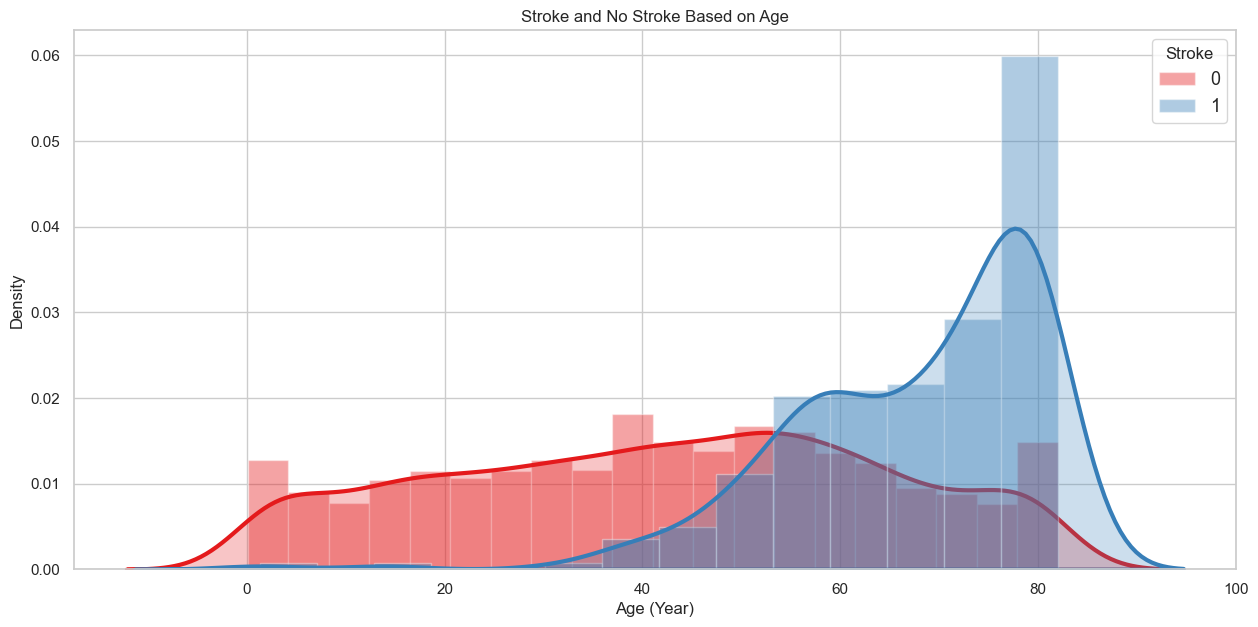

In [25]:
plt.figure(figsize=(15, 7))

stroke_int = [0, 1]

for stroke in stroke_int:
    subset = df[df['stroke'] == stroke]
    
    sns.distplot(subset['age'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = stroke )
    
plt.legend(prop={'size': 13}, title = 'Stroke')
plt.title('Stroke and No Stroke Based on Age')
plt.xlabel('Age (Year)')
plt.ylabel('Density')

> Many people above 40 years old has stroke

Text(0, 0.5, 'Density')

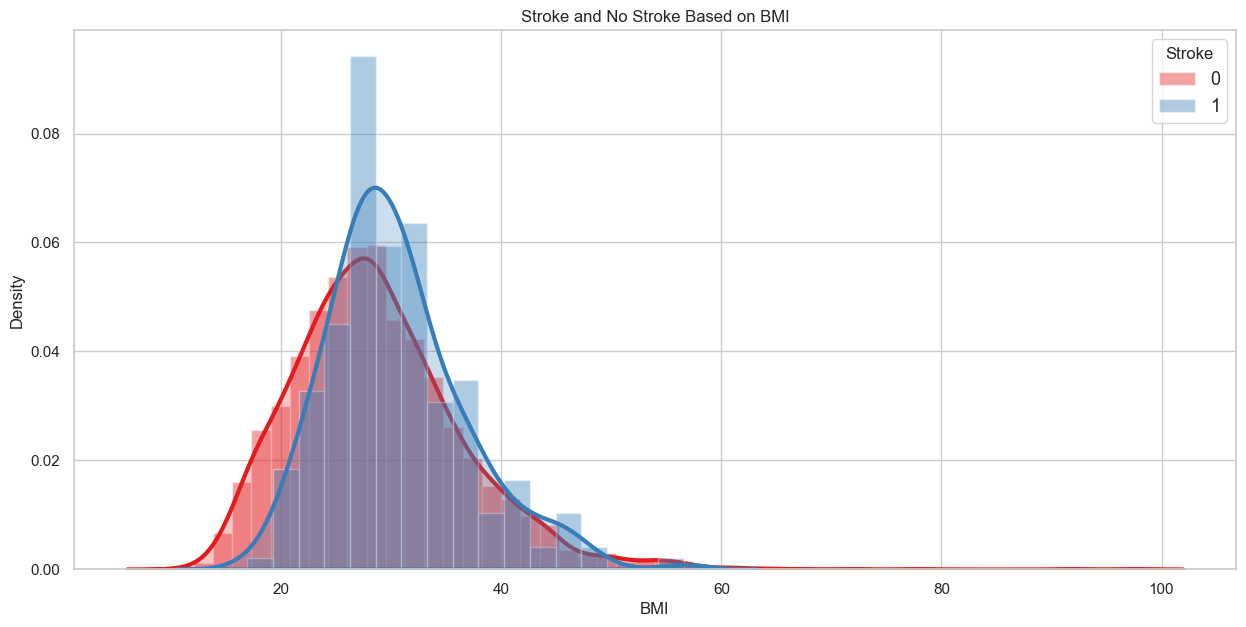

In [26]:
plt.figure(figsize=(15, 7))

stroke_int = [0, 1]

for stroke in stroke_int:
    subset = df[df['stroke'] == stroke]
    
    sns.distplot(subset['bmi'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = stroke )
    
plt.legend(prop={'size': 13}, title = 'Stroke')
plt.title('Stroke and No Stroke Based on BMI')
plt.xlabel('BMI')
plt.ylabel('Density')

> BMI doesn't seem to have a significant impact on whether someone has a stroke or not.
However, the correlation betwewn BMI and Stroke is only at 0.042. Furthermore, the BMI column still contains a lot of missing value

Text(0, 0.5, 'Density')

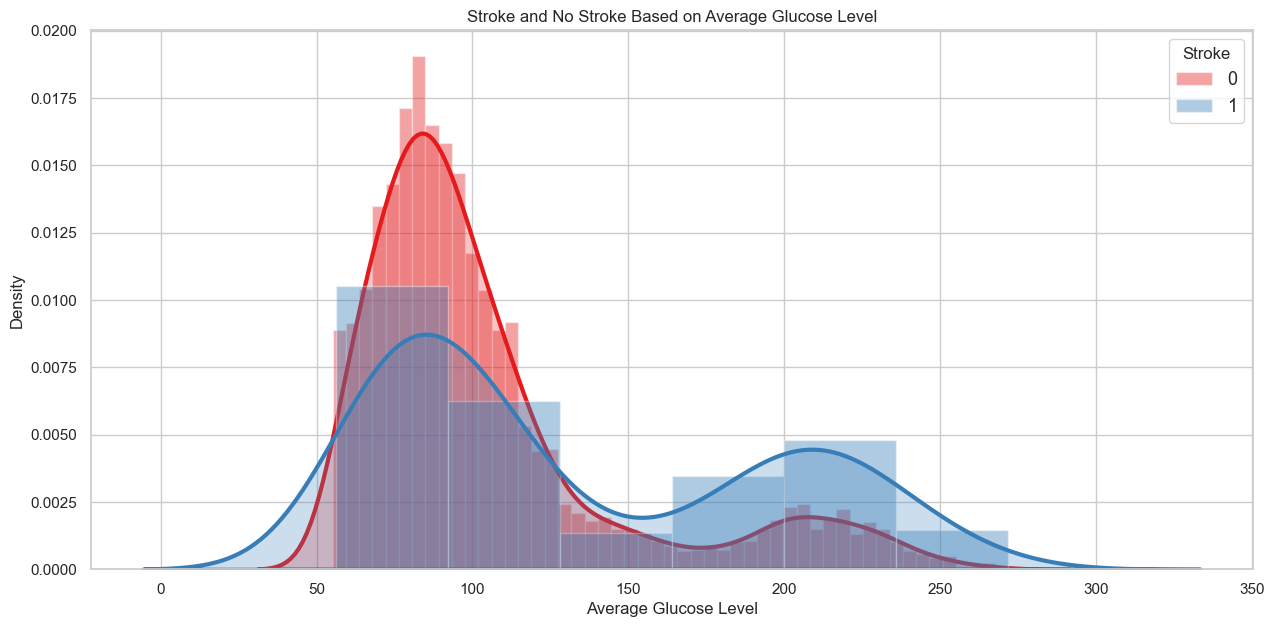

In [27]:
plt.figure(figsize=(15, 7))

stroke_int = [0, 1]

for stroke in stroke_int:
    subset = df[df['stroke'] == stroke]
    
    sns.distplot(subset['avg_glucose_level'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = stroke )
    
plt.legend(prop={'size': 13}, title = 'Stroke')
plt.title('Stroke and No Stroke Based on Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')

> Average Glucose Level doesn't seem to have a significant impact on whether someone has a stroke or not. However, the correlation betwewn Average Glucose Level and Stroke is only at 0.13

--------------------------------------------------------------------------------------------------------------------------------
# Data Cleaning

--------------------------------------------------------------------------------------------------------------------------------


### Outliers Handling

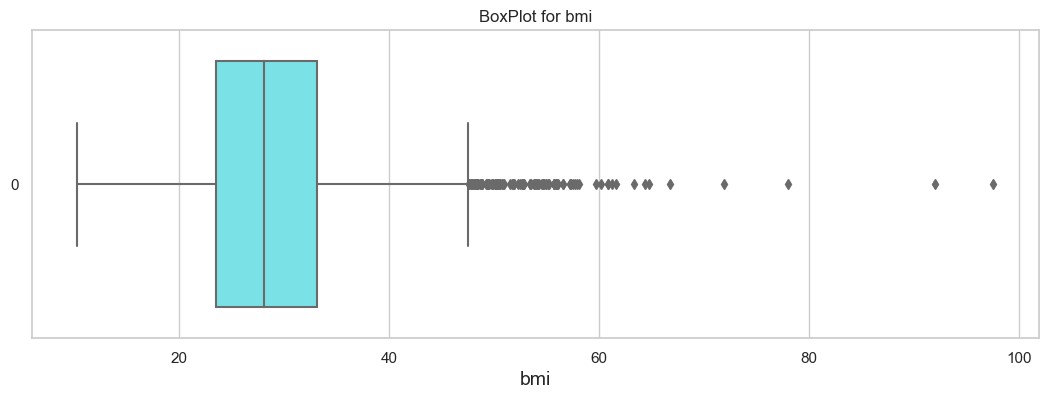

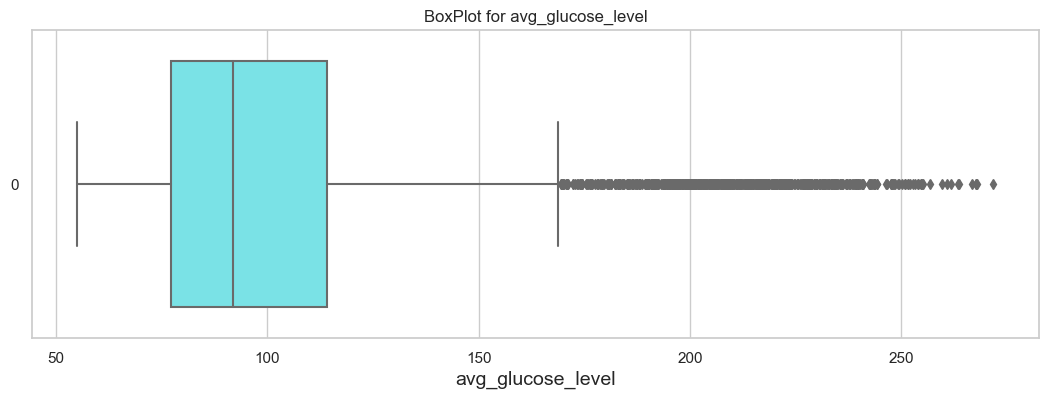

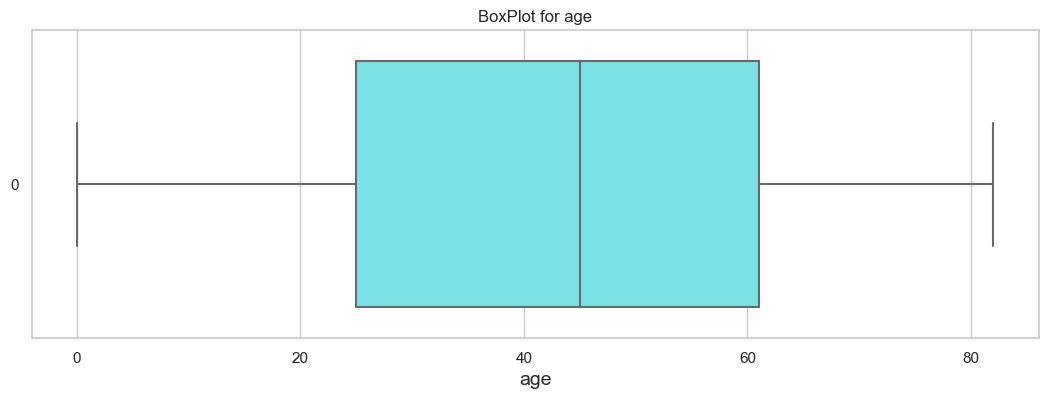

In [29]:
columns = ['bmi', 'avg_glucose_level', 'age']

for col in columns:
    fig = plt.figure(figsize=(13,4))
    sns.boxplot(df[col], orient='h', color='#68f3f8')
    plt.title('BoxPlot for ' + col , fontsize=12)
    plt.xlabel(col , fontsize=14)
    plt.show()

In [30]:
index_list = []

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[col]>=upper)[0]
    lower_array = np.where(df[col]<=lower)[0]
    
    for i in range(len(upper_array)):
        index_list.append(upper_array[i])
    for j in range(len(lower_array)):
        index_list.append(lower_array[j])
        
index_list = list(set(index_list))
print(len(index_list))
print(index_list)

710
[0, 1, 4096, 3, 4, 5, 4104, 2059, 13, 14, 16, 17, 2067, 19, 21, 20, 2071, 22, 23, 2069, 27, 28, 29, 4126, 30, 32, 2081, 33, 2079, 36, 4129, 4132, 2089, 44, 45, 2096, 54, 55, 2102, 57, 4154, 58, 59, 60, 2107, 66, 4164, 71, 73, 76, 2124, 2126, 2128, 2129, 4176, 2132, 2135, 2136, 90, 4188, 95, 97, 101, 102, 2149, 4201, 107, 2158, 4207, 113, 4209, 115, 2161, 2166, 2168, 2169, 122, 123, 124, 4223, 128, 4225, 130, 132, 2180, 134, 135, 2182, 137, 138, 139, 2185, 144, 4240, 149, 150, 151, 2200, 2201, 4249, 155, 2203, 157, 158, 163, 4261, 175, 2223, 4274, 179, 2228, 2232, 187, 4283, 189, 190, 4286, 2240, 193, 4290, 195, 196, 4291, 201, 2255, 4304, 2257, 212, 215, 4311, 217, 218, 219, 220, 222, 225, 226, 2273, 4321, 2277, 4324, 4325, 4327, 233, 234, 235, 2284, 2282, 4329, 4335, 241, 2290, 242, 243, 2291, 2292, 2293, 2294, 4339, 4344, 254, 4351, 256, 2303, 258, 2307, 4356, 2309, 4123, 4360, 270, 2318, 272, 4366, 277, 278, 4376, 4377, 2330, 2332, 2336, 2338, 293, 4390, 298, 303, 307, 4405, 440

In [31]:
df.drop(index=index_list, axis=0, inplace=True)

In [32]:
df.shape

(4400, 11)

### Handling Missing Values

In [33]:
no_bmi = df[df['bmi'].isnull()]
no_bmi.shape

(140, 11)

In [34]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

> There's 140 rows that has no value in 'bmi' column

In [35]:
#Remove every row that has no value in 'bmi' column
df.dropna(subset=['bmi'], inplace=True)

In [36]:
no_bmi_dropped = df[df['bmi'].isnull()]
no_bmi_dropped.shape

(0, 11)

> every row that has missing value in 'bmi' column has been deleted

In [46]:
# New Shape So Far
df.shape

(4260, 11)

In [47]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

> No more missing value

### Handling Imbalance Data

In [83]:
stroke_count = dict(df['stroke'].value_counts())

fig = px.pie(names = ['Not Stroke','Stroke'],
             values = stroke_count.values(),
             title = 'Stroke Count',
             hole = 0.6)
fig.show()

In [53]:
stroke_count.values()

dict_values([4124, 136])

> the imbalance data is very obvious

In [73]:
df0 = df[df["stroke"]==0]
df1 = df[df["stroke"]==1]

print(df['stroke'].value_counts())

0    4124
1     136
Name: stroke, dtype: int64


In [79]:
from sklearn.utils import resample

df1 = resample(df1,
               replace=True,
               n_samples= 4124,
               random_state=42)

df = pd.DataFrame(np.concatenate((df0,df1)))
df.columns = ['gender', 
              'age', 
              'hypertension', 
              'heart_disease', 
              'ever_married',
              'work_type', 
              'Residence_type', 
              'avg_glucose_level', 
              'bmi',
              'smoking_status', 
              'stroke']

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
8243,Female,59.0,0,0,Yes,Private,Rural,116.44,23.8,smokes,1
8244,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1
8245,Male,59.0,0,0,Yes,Private,Urban,111.04,32.0,formerly smoked,1
8246,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [82]:
stroke_count = dict(df['stroke'].value_counts())

fig = px.pie(names = ['Not Stroke','Stroke'],
             values = stroke_count.values(),
             title = 'Stroke Count',
             hole = 0.6)
fig.show()

In [81]:
stroke_count.values()

dict_values([4124, 4124])

> "Balance"

### Feature Encoding

In [84]:
print("see you today")

see you today
